In [1]:
import torch

from core.full_mcts import VectorizedMCTS
from envs.othello.vectenv import OthelloVectEnv
from envs.othello.trainer import init_othello_trainer_from_checkpoint

In [2]:
trainer = init_othello_trainer_from_checkpoint(4, './checkpoints/12.pt', torch.device('cpu'))

/Users/marshingjay/Repos/lazyzero/envs/othello/torchscripts.py:121: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  board_size = int(states.shape[-1]) # need to wrap in int() for tracing


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
import graphviz



model = trainer.model
model.eval()
pass

In [4]:
SEARCH_ITERS = 100
PARALLEL_ENVS = 4
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
env = OthelloVectEnv(PARALLEL_ENVS, DEVICE, debug=True)

In [5]:
mcts = VectorizedMCTS(env, 1000, 1.0)

In [6]:

def viz_it():
    dot = graphviz.Digraph()

    node_id_move_map = {1: 'root'}

    env_id = 3

    for i in range(1, 1000):
        if i in node_id_move_map:
            dot.node(str(i), node_id_move_map[i])
            for j in range(64):
                visits = mcts.nodes[env_id, i, mcts.n_start + j]
                if mcts.nodes[env_id, i, mcts.n_start + j] > 0:
                    master_id = mcts.nodes[env_id, i, mcts.i_start + j].long().item()
                    node_id_move_map[master_id] = str(j)
                    dot.edge(str(i), str(master_id), label=str(visits.long().item()))
    return dot

In [7]:
visits = mcts.explore(model)

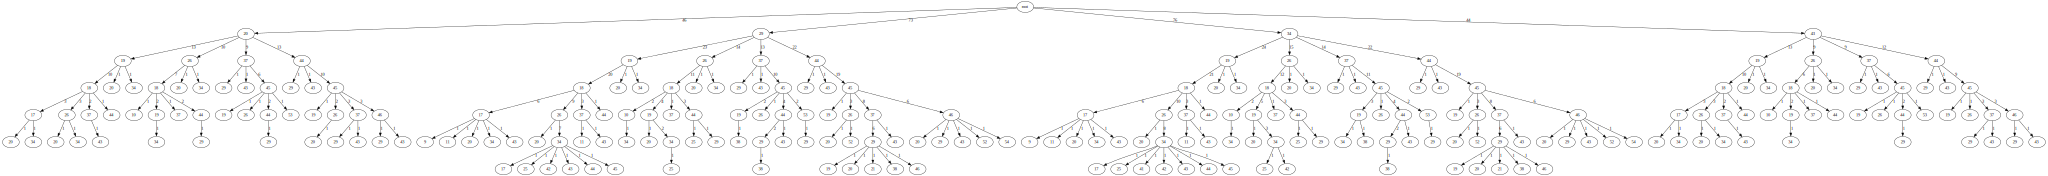

In [8]:
viz_it()

In [9]:
actions = torch.argmax(visits, dim=1)

In [14]:
actions

tensor([34, 34, 34, 34])

In [10]:
mcts.env.step(actions)

tensor([False, False, False, False])

In [11]:
visits = mcts.explore(model, actions)

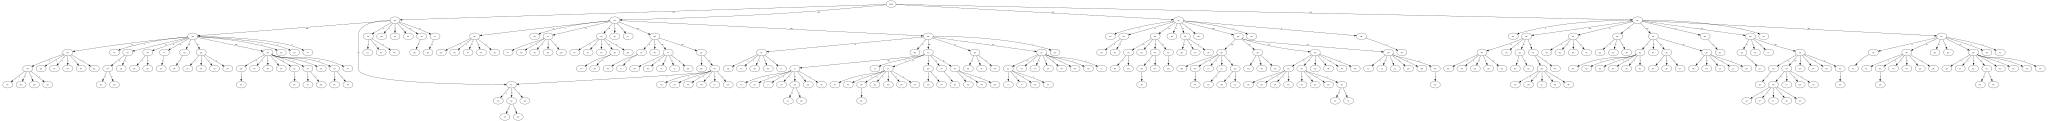

In [13]:
viz_it()

In [15]:
mcts.nodes[0, 102, mcts.n_start:mcts.n_end]

tensor([272.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.])